In [ ]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 


In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/brain tumour/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
result[0]        

array([[1., 0.]])

In [ ]:
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/brain tumour/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(134, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(134,2)
result.shape

(134, 2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)       

In [ ]:
x_train.shape

(107, 128, 128, 3)

In [ ]:
y_train.shape

(107, 2)

In [ ]:
history = model.fit(x_train, y_train,
                   epochs = 40,
                   batch_size = 128,
                   verbose = 1,
                   validation_data = (x_test, y_test))

Epoch 1/40
1/1 [==============================] - 6s 6s/step - loss: 1.7535 - val_loss: 31.8687
Epoch 2/40
1/1 [==============================] - 4s 4s/step - loss: 15.4578 - val_loss: 238.6991
Epoch 3/40
1/1 [==============================] - 4s 4s/step - loss: 40.9446 - val_loss: 13.4921
Epoch 4/40
1/1 [==============================] - 4s 4s/step - loss: 2.1918 - val_loss: 124.9573
Epoch 5/40
1/1 [==============================] - 4s 4s/step - loss: 9.6817 - val_loss: 112.5109
Epoch 6/40
1/1 [==============================] - 4s 4s/step - loss: 7.5810 - val_loss: 75.1781
Epoch 7/40
1/1 [==============================] - 4s 4s/step - loss: 1.8906 - val_loss: 35.3740
Epoch 8/40
1/1 [==============================] - 4s 4s/step - loss: 0.5492 - val_loss: 12.8547
Epoch 9/40
1/1 [==============================] - 4s 4s/step - loss: 2.6420 - val_loss: 7.4498
Epoch 10/40
1/1 [==============================] - 4s 4s/step - loss: 2.5092 - val_loss: 7.8772
Epoch 11/40
1/1 [===================

In [ ]:
 def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is Its a Tumor


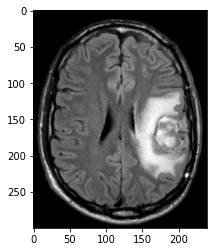

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/brain tumour/yes/Y20.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [ ]:
img = Image.open(r"/content/drive/MyDrive/brain tumour/no/98 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

FileNotFoundError: ignored